# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 586


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = {"q": city, "units": "metric", "APPID": weather_api_key}

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(url, params = city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bethel
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | namibe
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | vorgashor
Processing Record 6 of Set 1 | suncho corral
Processing Record 7 of Set 1 | thompson
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | linxia chengguanzhen
Processing Record 10 of Set 1 | colonia
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | puerto natales
Processing Record 13 of Set 1 | port-cartier
Processing Record 14 of Set 1 | bengkulu
Processing Record 15 of Set 1 | pisco
Processing Record 16 of Set 1 | port mathurin
Processing Record 17 of Set 1 | sitka
Processing Record 18 of Set 1 | pamandzi
Processing Record 19 of Set 1 | taiohae
City not found. Skipping...
Processing Record 20 of Set 1 | cadale
Processing Record 21 of Set 1 | palasa
Processing Record 22 of Set 1 | ala

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bethel,41.3712,-73.4140,1.46,60,36,0.79,US,1733176930
1,albany,42.6001,-73.9662,-0.62,69,47,0.89,US,1733176692
2,namibe,-15.1961,12.1522,20.65,79,24,1.90,AO,1733176932
3,port-aux-francais,-49.3500,70.2167,6.40,97,100,8.50,TF,1733176934
4,vorgashor,67.5833,63.9500,-7.22,95,100,6.59,RU,1733176935


In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bethel,41.3712,-73.4140,1.46,60,36,0.79,US,1733176930
1,albany,42.6001,-73.9662,-0.62,69,47,0.89,US,1733176692
2,namibe,-15.1961,12.1522,20.65,79,24,1.90,AO,1733176932
3,port-aux-francais,-49.3500,70.2167,6.40,97,100,8.50,TF,1733176934
4,vorgashor,67.5833,63.9500,-7.22,95,100,6.59,RU,1733176935


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# # Read saved data
# city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# # Display sample data
# city_data_df.head()

print(city_data_df.columns)

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

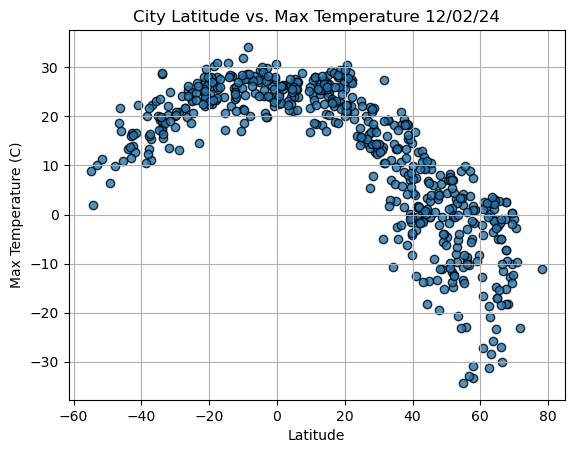

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], 
            city_data_df["Max Temp"], 
            edgecolor="black", 
            linewidths=1, 
            marker="o", 
            alpha=0.8, 
            label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

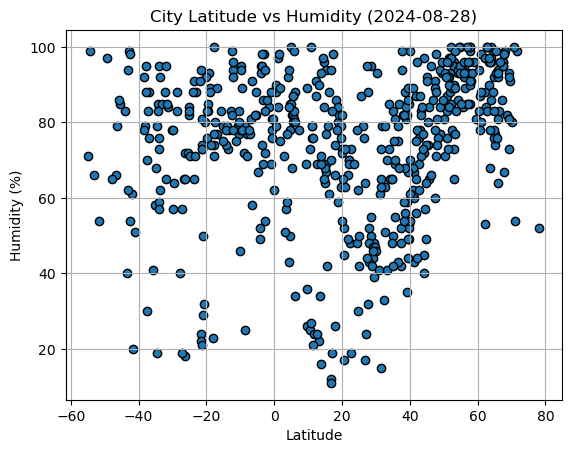

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity (2024-08-28)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

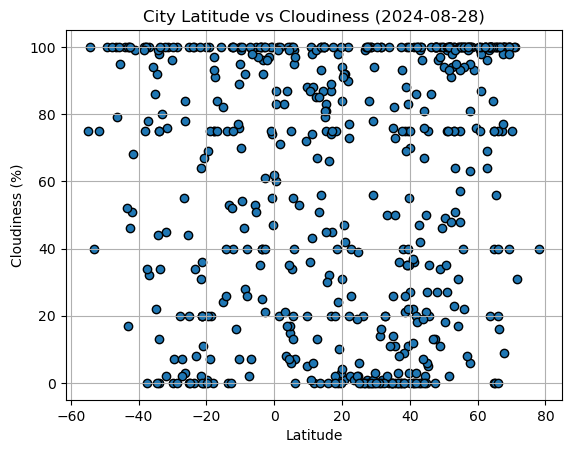

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness (2024-08-28)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

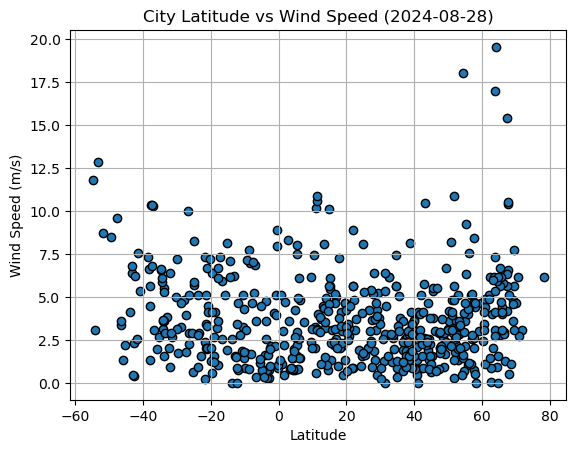

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors='black')
# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed (2024-08-28)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# required variables for x-axis and y-axis of the plot
x_label = "X Label"
x_values = [0,1,2]
y_label = "Y Label"
y_values = [0,1,2]
def add_lin_reg_plot(x_label, x_values, y_label, y_values):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    # Create the scatter plot
    plt.scatter(x_values, y_values, marker="o", edgecolors='black')
    # Create and plot the regression line
    reg_line = x_values * slope + intercept
    plt.plot(x_values, reg_line, color='r')
    # Add labels and legend
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f"{x_label} vs {y_label}")
    # Set the Annotation Equation
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Annotate in lower or upper left corner, based on slope
    if slope >=0:
        plt.annotate(line_eq,(min(x_values),max(y_values)*.9),fontsize=15,color="red")
    else:
        plt.annotate(line_eq,(min(x_values),min(y_values)),fontsize=15,color="red")
# Show the R^2 Value
    print(f"The r^2-value is: {rvalue**2}")
    # Show the plot
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bethel,41.3712,-73.4140,1.46,60,36,0.79,US,1733176930
1,albany,42.6001,-73.9662,-0.62,69,47,0.89,US,1733176692
4,vorgashor,67.5833,63.9500,-7.22,95,100,6.59,RU,1733176935
6,thompson,55.7435,-97.8558,-22.91,84,40,1.03,CA,1733176937
8,linxia chengguanzhen,35.6003,103.2064,-4.96,81,11,0.90,CN,1733176939


In [29]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,namibe,-15.1961,12.1522,20.65,79,24,1.90,AO,1733176932
3,port-aux-francais,-49.3500,70.2167,6.40,97,100,8.50,TF,1733176934
5,suncho corral,-27.9336,-63.4294,24.19,40,20,4.84,AR,1733176936
7,waitangi,-43.9535,-176.5597,13.43,83,100,4.11,NZ,1733176938
10,grytviken,-54.2811,-36.5092,1.91,99,100,3.08,GS,1733176942


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.7091908388651594


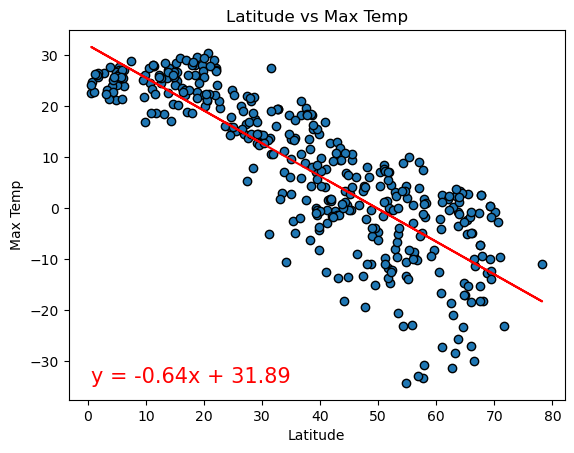

In [30]:
# Linear regression on Northern Hemisphere

# required variables for x-axis and y-axis of the plot
x_label = "Latitude"
x_values = northern_hemi_df["Lat"]

y_label = "Max Temp"
y_values = northern_hemi_df["Max Temp"]

# linear regression function created previously
add_lin_reg_plot(x_label, x_values, y_label, y_values)

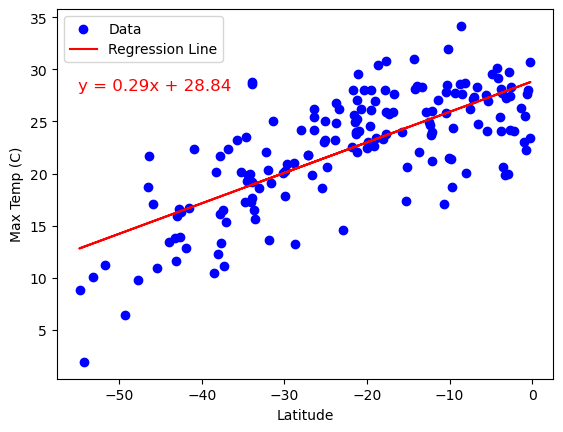

In [31]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
x_label = "Latitude"
y_label = "Max Temp (C)"

create_linear_regression_plot(x_values, y_values, x_label, y_label, (-55, 28))

**Discussion about the linear relationship:** 
First Plot (Latitude vs. Max Temp - Positive Latitude Values):

-The data shows a negative correlation between latitude and maximum temperature.
-As latitude increases (moving further north from the equator), the maximum temperature tends to decrease.
-The regression line equation 𝑦=−0.64𝑥+31.89 indicates a slope of -0.64, meaning that for every 1-degree increase in latitude, the maximum temperature decreases by approximately 0.64°C.

Second Plot (Latitude vs. Max Temp - Negative Latitude Values):

-This plot represents data for southern latitudes (negative latitude values).
-The data shows a positive correlation, meaning as latitude approaches the equator (moving from the south), the maximum temperature increases.
-The regression line equation 𝑦=0.29𝑥+28.84 indicates a slope of 0.29, meaning that for every 1-degree decrease in latitude (moving closer to the equator), the maximum temperature increases by 0.29C.

The first plot represents a cooling effect as we move north, while the second plot represents a warming effect as we approach the equator from the southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

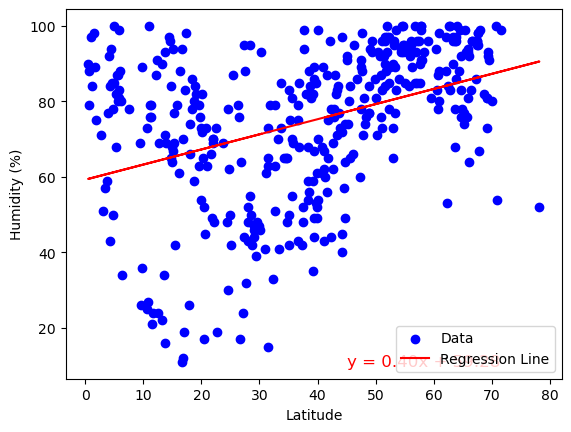

In [32]:
# Northern Hemisphere

def create_linear_regression_plot(x, y, x_label=None, y_label=None, label_position=None):
# x_values = northern_hemi_df["Lat"] # Set x axis
# y_values = northern_hemi_df["Humidity"] # Set y axis
# x_label = "Latitude" # Set x label
# y_label = "Humidity (%)" # Set y label

# create_linear_regression_plot(x_values, y_values, x_label, y_label, (45, 10)) # Run function defined above     

 # Convert data to NumPy arrays and reshape for sklearn
    x = np.array(x).reshape(-1, 1)
    y = np.array(y)

    # Create and fit the linear regression model
    model = LinearRegression()
    model.fit(x, y)

    # Generate predictions
    y_pred = model.predict(x)

    # Plot the data and the regression line
    plt.scatter(x, y, color="blue", label="Data")
    plt.plot(x, y_pred, color="red", label="Regression Line")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()

    # Add a label to the plot at the specified position, if provided
    if label_position:
        plt.text(label_position[0], label_position[1], f"y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}", 
                 color="red", fontsize=12)

    # Show the plot
    plt.show()

# Example usage for Northern Hemisphere
x_values = northern_hemi_df["Lat"]  # Set x axis
y_values = northern_hemi_df["Humidity"]  # Set y axis
x_label = "Latitude"  # Set x label
y_label = "Humidity (%)"  # Set y label

# Call the function
create_linear_regression_plot(x_values, y_values, x_label, y_label, (45, 10))



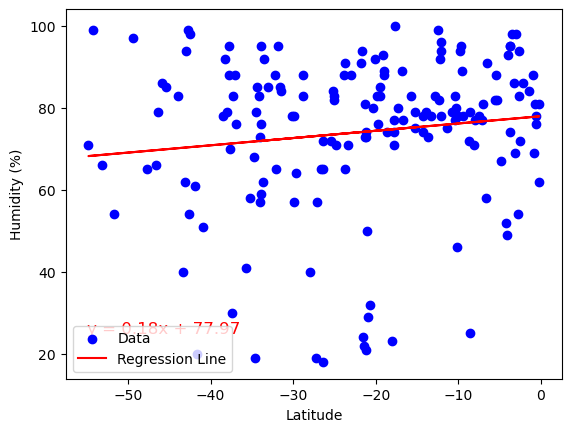

In [33]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"] # Set x axis
y_values = southern_hemi_df["Humidity"] # Set y axis
x_label = "Latitude" # Set x label
y_label = "Humidity (%)" # Set y label

create_linear_regression_plot(x_values, y_values, x_label, y_label, (-55, 25)) # Run function defined above 

**Discussion about the linear relationship:** 
First Graph
-Positive Slope: The equation of the regression line y=0.40x+54.87 suggests a slight positive correlation between latitude and humidity. As latitude increases, humidity tends to increase slightly.
-Scatter Points: The data points appear widely dispersed around the regression line, indicating weak or no strong linear correlation. However, a trend is visible.

Second Graph
-Weaker Positive Slope: The regression line y=0.18x+77.97 also shows a weak positive correlation between latitude and humidity, though the slope is smaller than in the first graph.
-Data Spread: The scatter points are similarly distributed and do not closely follow the regression line, reinforcing the weak nature of the correlation.

Comparison and Discussion
-Both graphs show weak positive relationships between latitude and humidity. However, the strength of the relationship (indicated by the slope) varies slightly.
-The dispersion of the data points suggests that while there might be a pattern, latitude is not a strong predictor of humidity in this dataset.
-Additional statistical metrics, such as 𝑅2 (coefficient of determination), could help quantify how well the regression line fits the data.

### Cloudiness vs. Latitude Linear Regression Plot

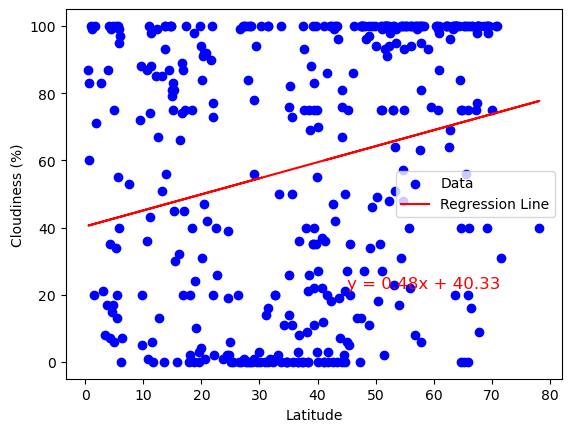

In [34]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"] # Set x axis
y_values = northern_hemi_df["Cloudiness"] # Set y axis
x_label = "Latitude" # Set x label
y_label = "Cloudiness (%)" # Set y label

create_linear_regression_plot(x_values, y_values, x_label, y_label, (45, 22)) # Run function defined above   

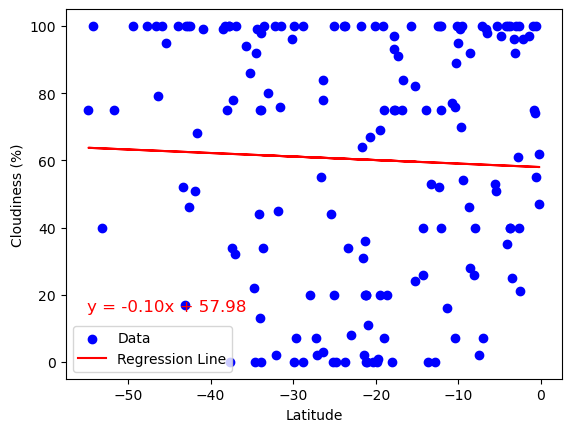

In [35]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"] # Set x axis
y_values = southern_hemi_df["Cloudiness"] # Set y axis
x_label = "Latitude" # Set x label
y_label = "Cloudiness (%)" # Set y label

create_linear_regression_plot(x_values, y_values, x_label, y_label, (-55, 15)) # Run function defined above 


**Discussion about the linear relationship:** 
First Plot (Latitude: 0 to 80):

-Positive Slope (0.48): Indicates a slight positive relationship between latitude and cloudiness in this region. As latitude increases, there is a tendency for cloudiness to increase.
-The data points are scattered widely around the regression line, suggesting that latitude alone does not strongly predict cloudiness (low correlation).

Second Plot (Latitude: -50 to 0):

-Negative Slope (-0.10): Indicates a very slight negative relationship between latitude and cloudiness in this region. As latitude moves closer to the equator (latitude = 0), cloudiness decreases slightly.
-Similarly, the spread of points suggests weak or no strong correlation.

-Weak Trends: The regression lines in both cases suggest weak trends since the slopes are small and the scatter of points around the line is significant.
-Latitude Influence: While there is some variation with latitude, cloudiness is likely influenced by many other factors (e.g., geography, weather systems, altitude).
-Inter-Hemispheric Comparison: The opposite slope directions in the two plots reflect differing trends in cloudiness patterns between the Northern and Southern Hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

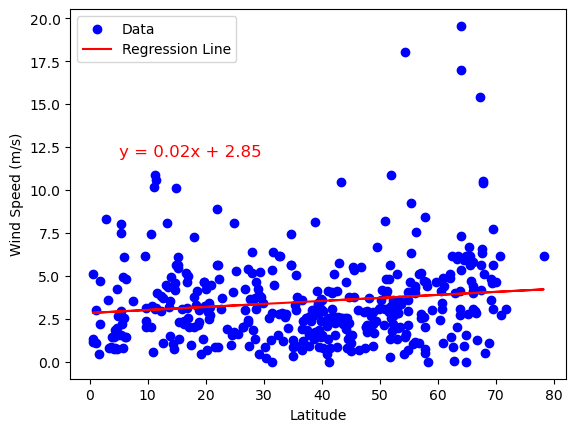

In [36]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"] # Set x axis
y_values = northern_hemi_df["Wind Speed"] # Set y axis
x_label = "Latitude" # Set x label
y_label = "Wind Speed (m/s)" # Set y label

create_linear_regression_plot(x_values, y_values, x_label, y_label, (5, 12))

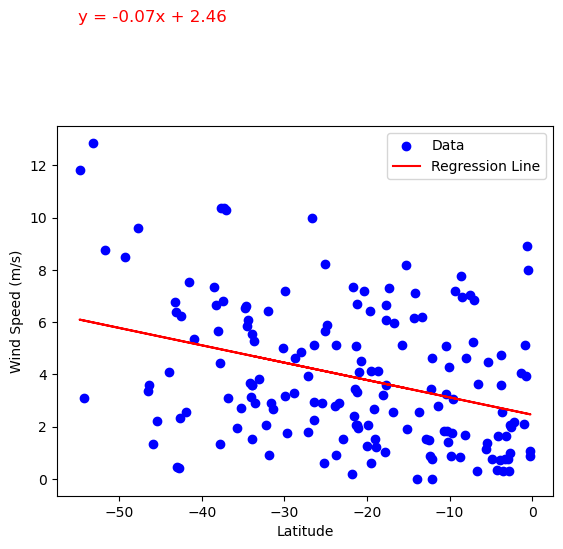

In [37]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"] # Set x axis
y_values = southern_hemi_df["Wind Speed"] # Set y axis
x_label = "Latitude" # Set x label
y_label = "Wind Speed (m/s)" # Set y label

create_linear_regression_plot(x_values, y_values, x_label, y_label, (-55, 17.5))

**Discussion about the linear relationship:** First Plot (Latitude: 0 to 80)

-Slope: The positive slope (0.02) indicates a very slight increase in wind speed as latitude increases.
-Observation: The data points are scattered widely with a weak upward trend, suggesting minimal correlation between wind speed and latitude.

Second Plot (Latitude: -50 to 0)

0Slope: The negative slope (-0.07) shows a slight decrease in wind speed as latitude increases (approaching the equator from the southern hemisphere).
0Observation: There’s a more apparent downward trend here, suggesting a weak negative correlation between wind speed and latitude in this region.

In both cases, the relationships are weak, as evidenced by the small slopes.
The spread of data points suggests significant variability in wind speed unrelated to latitude.
Regional Differences:

The northern hemisphere (first plot) shows almost no change in wind speed with latitude.
The southern hemisphere (second plot) shows a slightly stronger (but still weak) correlation, with wind speed decreasing as latitude increases toward the equator.